In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from genetic_algorithm import GeneticFeatures

from sklearn import linear_model



pd.set_option('display.max_columns', None)

In [2]:
# Import data
data = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/final_data.csv')
data = data.fillna(0)


In [3]:
y = data['GBA6RTT']/100
X = data.drop(columns = ['Unnamed: 0', 'UNITID', 'INSTNM', 'STABBR', 'ZIP', 'LOCALE', 'OBEREG','GBA6RTT', 'GBA6RTM', 'GBA6RTW'])

In [5]:
# Create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Running DT without Genetic Algorithm - Finding best starting parameters

In [6]:
max_depth = np.arange(1,30+1)
rmse = []

for depth in max_depth:
    regressor = DecisionTreeRegressor(random_state = 123, max_depth = depth)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

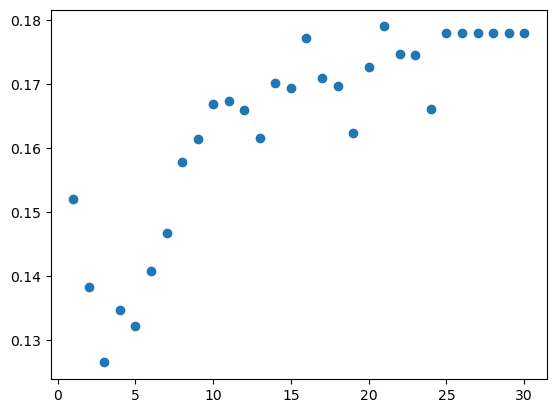

In [6]:
plt.scatter(max_depth, rmse)

In [7]:
min_split = np.arange(2, 60+1)
rmse = []

for split in min_split:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_split = split)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

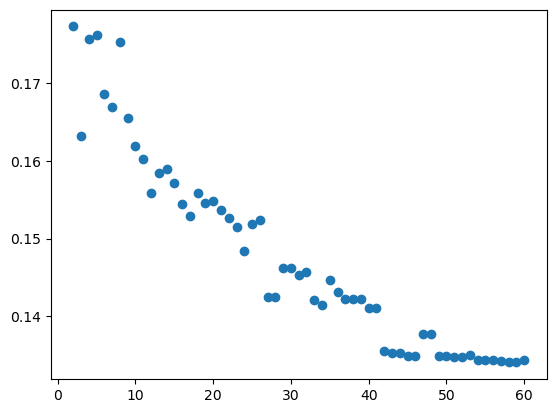

In [14]:
plt.scatter(min_split, rmse)

In [15]:
min_leaf = np.arange(2, 60+1)
rmse = []

for leaf in min_leaf:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = leaf)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

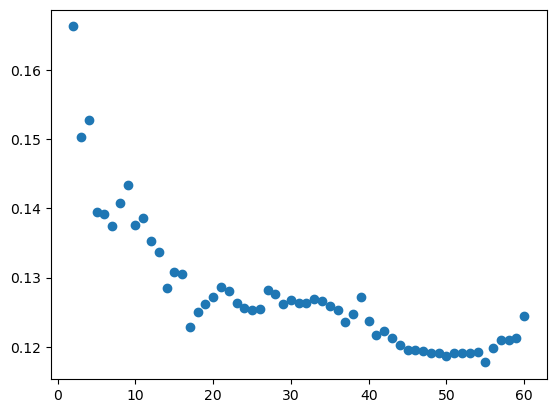

In [16]:
plt.scatter(min_split, rmse)

In [4]:
regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 45)  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(regressor.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

NameError: name 'X_train' is not defined

In [18]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

0.569065640272691
0.12663545894237294


Running Genetic Algorithm

In [4]:
model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 45)  

In [41]:
genAlgo = GeneticFeatures(X, y, 40, 20, model, 0.2, 50)
genAlgo.run()

Starting Genetic Feature Selection
Running Generation 0
Best Fitness score: 0.013858480031606672

Running Generation 1
Best Fitness score: 0.013612948456729572

Running Generation 2
Best Fitness score: 0.013746294619966438

Running Generation 3
Best Fitness score: 0.014146374562008656

Running Generation 4
Best Fitness score: 0.013552802541977148

Running Generation 5
Best Fitness score: 0.01365733160255427

Running Generation 6
Best Fitness score: 0.013610352664111197

Running Generation 7
Best Fitness score: 0.013833225544860816

Running Generation 8
Best Fitness score: 0.01389577563441568

Running Generation 9
Best Fitness score: 0.013535937928201323

Running Generation 10
Best Fitness score: 0.013778722189941764

Running Generation 11
Best Fitness score: 0.01376058726561969

Running Generation 12
Best Fitness score: 0.013840363761226375

Running Generation 13
Best Fitness score: 0.0133105168679095

Running Generation 14
Best Fitness score: 0.014332121388857364

Running Generation 1

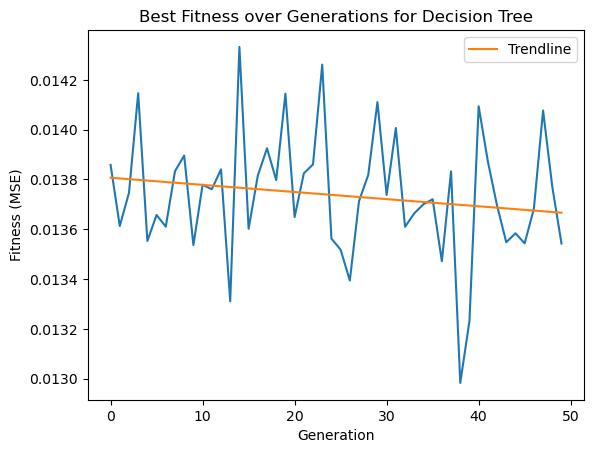

In [42]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,50), fitness)
m, b = np.polyfit(np.arange(0,50), fitness, 1)
plt.plot(np.arange(0,50), m*np.arange(0,50) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (MSE)')
plt.title('Best Fitness over Generations for Decision Tree')
plt.legend()

In [35]:
print(m)

-4.616574282794311e-06


In [12]:
chromosomes = genAlgo.best_chromosomes[-1]

In [17]:
print(*, X.columns[chromosomes] sep="\n")

PEO4ISTR
LEVEL8
LEVEL17
LEVEL18
OPENADMP
CREDITS1
CREDITS2
CREDITS3
SLO5
STUSRV3
ATHASSOC
SPORT3
SPORT4
APPLFEEU
ROOM
ALLONCAM
TUITPL
DISTCRS
LIBRES1
LIBRES2
LIBRES3
LIBRES4
FEE3
chg2ay2
chg2af2
chg2af3
chg3ay2
chg3af3
RMOUSTTP
DVEF14
DVEF15
EFUG1ST
EFUGTRN
EFUGCNT
PCUENRAN
PCUENRHS
PCUENRUN
PCUENRNR
PCUENRW
EFUGFT
PCUENRNH
PCUENRAS
PCUDENON
LPBOOKSP
LPMEDIAP
LEMEDIAP
LSALWAGP
LEXMSBBP
LEXMSOTP
LEXPTOTF
F1STAPPC
F1PBSVPC
F2PBSVPC
F3SSEAFT
F3SWRSRP
F3SWACSP
F3SWOTEP
F1SWCREP
F1SWINSP
F1SWPBSP
F1SWISPP
F2SWINSP
F2SWRSRP
F2SWPBSP
F2SWSTSP
F2SWISPP
SALTOTL
SalAssc
CINSON
CINSOFF
COTSOFF
TUFEYR3
IDX_SFA
CARNEGIE_MASTERS
CARNEGIE_BACHLIBARTS
PCTUITION
PCPRVTGRNT
PCINVRV
PCOTHERREV
PCRESEARCH
PCPUBSERV
PCSTDNTSUPPORT
PCOTHEREXP
EQTYRATIO
ENDOWTTL
SGRNT_T
IGRNT_T
FLOAN_T
SCFA12P
FGRNT_P
IGRNT_P
IGRNT_A
PGRNT_P
FLOAN_A
OLOAN_P
UAGRNTP
UPGRNTA
UFLOANP
UFLOANA
UFLOANT
PGRNT_T
OLOAN_T
GRN4T12
GRN4T22
AVGGRANT2
AVGGRANT3
INSTRPCWHTE


In [36]:
reg = linear_model.LinearRegression()

genAlgo = GeneticFeatures(X, y, 40, 20, reg, 0.2, 50)
genAlgo.run()

Starting Genetic Feature Selection
Running Generation 0
Best Fitness score: 0.01366291357160252

Running Generation 1
Best Fitness score: 0.012961270659682868

Running Generation 2
Best Fitness score: 0.013217501583161621

Running Generation 3
Best Fitness score: 0.013418008204691086

Running Generation 4
Best Fitness score: 0.013142885877363423

Running Generation 5
Best Fitness score: 0.012915981150705962

Running Generation 6
Best Fitness score: 0.013645933184384125

Running Generation 7
Best Fitness score: 0.013560478379340431

Running Generation 8
Best Fitness score: 0.013518600031724457

Running Generation 9
Best Fitness score: 0.013372641018040523

Running Generation 10
Best Fitness score: 0.013678776874832606

Running Generation 11
Best Fitness score: 0.01290334877183288

Running Generation 12
Best Fitness score: 0.012629857911710955

Running Generation 13
Best Fitness score: 0.013136336127919528

Running Generation 14
Best Fitness score: 0.013219806201756069

Running Generatio

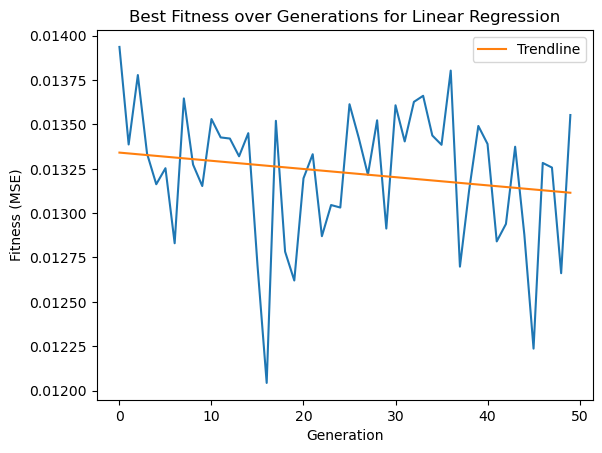

In [31]:
fitness = genAlgo.best_scores

plt.plot(np.arange(0,50), fitness)
m, b = np.polyfit(np.arange(0,50), fitness, 1)
plt.plot(np.arange(0,50), m*np.arange(0,50) + b, label='Trendline')
plt.xlabel('Generation')
plt.ylabel('Fitness (MSE)')
plt.title('Best Fitness over Generations for Linear Regression')
plt.legend()

In [39]:
min(genAlgo.best_scores)

0.012592955789956239